- Kaynak: Franchois Chollet, Deep Learning with Python

# Doğal Dil İşleme

- Sequence verilerinde kullanılan iki temel algoritma RNN, CNN1D
    - Doküman Sınıflandırma: Bir kitabın yazarını, makale başlığını tanımlama
    - Zaman Serileri: 
    - Diziden Diziye: İngilizce bir emtni Türkçeye çevirme
    - Duygu Analizi

- Diğer Sinir ağlarında olduğu gibi derin öğrenme modelleri de ham metin verisini girdi olarak almaz. Sadece sayısal tensörlerle çalışır.
- Vektör haline getirme işlemi, metni sayısal tensörlere dönüştürme işlemidir. Burada birkaç yöntem vardır:
    - Metni kelimelere böl, her kelimeyi vektöre dönüştür.
    - Metni karakterlere böl, her karakteri vektöre dönüştür.
    - Kelime veya karakterlerin n-gramlarını çıkar, her n-gramı vektöre dönüştür. (N-gram tekrar eden kelime karakter grupları)
- Metnin farklı birimlere (kelime/karakter/n-gram) ayrılmasıyla elde edilen yapıları token denilir.
- Metni vektör haline getirme işlemi, tokenize ettikten sonra her tokeni sayısal tensörle ilişkilendirmedir.

![](imgs_lstm/1.png)

- Bir vektörü bir tokenle ilişkilendirmenin yolları: One-hot encoding, embedding

![](imgs_lstm/4.png)

### WordVec

![](imgs_lstm/3.png)

### N-Gram

- Bir cümleden çıkarabileceğiniz N tane ve ya daha az kelime grubudur.

![](imgs_lstm/2.jpg)

### One-Hot Encoding

In [1]:
#data klasöründen verilerin okunması ve
#egitim_X[] içerisine kaydedilmesi
import os
 
#Text dosyaları data isimli klasör içerisinde olsun
BASE_DIR = os.getcwd()
TEXT_DATA_DIR = os.path.join(BASE_DIR, 'imgs_lstm')

In [12]:
egitim_X = []
#data klasöründeki tüm dosyaları teker teker oku
for name in sorted(os.listdir(TEXT_DATA_DIR)):
    fname = os.path.join(TEXT_DATA_DIR, name)
    #dosya uzantısı .txt ise 
    if fname.endswith("istiklal.txt"):
        with open(fname,encoding="ANSI") as infile:
            for line in infile:
                #satır başı ve sonu dışındaki olası boşlukları temizle
                line = line.strip()
                try:
                  egitim_X.append(line)
                except Exception as e:
                  print(e)


In [13]:
#ilk ve son satırları yazdır
print(egitim_X[0])
print(egitim_X[-2])

Korkma, sönmez bu şafaklarda yüzen al sancak;
Ulusun, korkma! Nasıl böyle bir îmânı boğar,


In [14]:
#veri sayısını yazdır
print(len(egitim_X))

16


In [19]:
from keras.preprocessing.text import Tokenizer
 
# tokinizer nesnesini oluştur
 
# parametres opsiyonları ve default değerleri
# num_words=None, lower=True, split=' ', char_level=False, oov_token=None
# filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~ '
 
# metinlerde en çok geçen 10 kelimenin işleme alınmasını sağlayalım
MAX_NUM_WORDS = 20
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)

# giriş verisine göre tokinizer sınıfının ayarlanması
tokenizer.fit_on_texts(egitim_X)

- Giriş verisi hala egitim_X ‘de saklandığı şekilde
- Fakat tokinizer giriş verisiyle ilgili bilmesi gereken bir çok şeyi biliyor
     - kelime listesi ,  kelime frekansları ,  en fazla geçen 10 kelime gibi

In [20]:
#hangi kelimelerin geçtiğine bakalım
for kelime in tokenizer.word_index:
    print(kelime)

bu
o
benim
korkma
milletimin
bir
hür
sönmez
şafaklarda
yüzen
al
sancak
sönmeden
yurdumun
üstünde
tüten
en
son
ocak
yıldızıdır
parlayacak
benimdir
milletimindir
ancak
çatma
kurban
olayım
çehreni
ey
nazlı
hilâl
kahraman
ırkıma
gül…
ne
şiddet
celâl
sana
olmaz
dökülen
kanlarımız
sonra
helâl
hakkıdır
hakk’a
tapan
istiklâl
ben
ezelden
beridir
yaşadım
yaşarım
hangi
çılgın
bana
zincir
vuracakmış
şaşarım
kükremiş
sel
gibiyim
bendimi
çiğner
aşarım
yırtarım
dağları
enginlere
sığmam
taşarım
garb’ın
âfâkını
sarmışsa
çelik
zırhlı
duvar
iman
dolu
göğsüm
gibi
serhaddim
var
ulusun
nasıl
böyle
îmânı
boğar
medeniyet
dediğin
tek
dişi
kalmış
canavar


In [21]:
print("Toplam ", len(tokenizer.word_index), " adet farklı kelime bulunmaktadır")
print("Toplam ", tokenizer.num_words, " adet  kelime işleme alınacaktır")

Toplam  92  adet farklı kelime bulunmaktadır
Toplam  20  adet  kelime işleme alınacaktır


- Görüldüğü üzere bütün kelimeler default olarak verilmiş split=’ ‘ kuralına göre bulunmuş
- Tokenizer sınıfının en önemli nesneleri word_index ve word_counts’dır.

In [23]:
print("korkma kelimesi toplam ", tokenizer.word_counts['bu'], " kez geçmiştir")
print("korkma kelimesine verilen id = ", tokenizer.word_index['bu'])

korkma kelimesi toplam  3  kez geçmiştir
korkma kelimesine verilen id =  1


In [24]:
#bütün kelimeleri ve frekanslarını yazdıralım
for kelime in tokenizer.word_index:
    print(kelime, "=", tokenizer.word_counts[kelime], "    ",)

bu = 3     
o = 3     
benim = 3     
korkma = 2     
milletimin = 2     
bir = 2     
hür = 2     
sönmez = 1     
şafaklarda = 1     
yüzen = 1     
al = 1     
sancak = 1     
sönmeden = 1     
yurdumun = 1     
üstünde = 1     
tüten = 1     
en = 1     
son = 1     
ocak = 1     
yıldızıdır = 1     
parlayacak = 1     
benimdir = 1     
milletimindir = 1     
ancak = 1     
çatma = 1     
kurban = 1     
olayım = 1     
çehreni = 1     
ey = 1     
nazlı = 1     
hilâl = 1     
kahraman = 1     
ırkıma = 1     
gül… = 1     
ne = 1     
şiddet = 1     
celâl = 1     
sana = 1     
olmaz = 1     
dökülen = 1     
kanlarımız = 1     
sonra = 1     
helâl = 1     
hakkıdır = 1     
hakk’a = 1     
tapan = 1     
istiklâl = 1     
ben = 1     
ezelden = 1     
beridir = 1     
yaşadım = 1     
yaşarım = 1     
hangi = 1     
çılgın = 1     
bana = 1     
zincir = 1     
vuracakmış = 1     
şaşarım = 1     
kükremiş = 1     
sel = 1     
gibiyim = 1     
bendimi = 1     
çiğner = 1    

- Bu aşamaya kadar gerçekleştirilen bütün adımlar, giriş verisinin sayısal veriler olarak temsil edilmesi içindi.  Şimdi bunu gerçekleştirelim:

In [25]:
sequences = tokenizer.texts_to_sequences(egitim_X)

for satir in sequences:
    print(satir, "  ",)

[4, 8, 1, 9, 10, 11, 12]   
[13, 14, 15, 16, 17, 18, 19]   
[2, 3, 5]   
[2, 2, 3]   
[]   
[6, 1, 1]   
[]   
[5]   
[7, 7]   
[]   
[]   
[]   
[]   
[3]   
[4, 6]   
[]   


- Veriler artık cümleler yerine sayısal değerler ifade edilmiş
- Fakat önemli eksikler var
- Bazı cümlelerin [] şeklinde boş dizilere dönüştüğünü görüyoruz
- Genellik tamamen boş diziyle karşılaşmak burdakindan daha nadir gerçekleşir. Çünki en azından en çok geçen 10.000 kelime’den birkaçı bir veride bulunması beklenir. Fakat bu örnekte, verileri manuel olarak takip edebilmemiz açısından az sayıda veri kullanıldı ve maksimum kelime sayısı 10 seçildi.
- Ayrıca görüldüğü üzere her veri farklı uzunlukta. Çoğu algoritma giriş verilerinin sabit uzunlukta olmasını bekler. Bu durumlarda tokenizer’ın padding metodunu kullanırız.

In [26]:
# her bir giriş verisininin uzunluğu yalnızca 4 olsun
from keras.preprocessing.sequence import pad_sequences
 
giris = pad_sequences(sequences, maxlen=4)

In [27]:
for satir in giris:
    print(satir, "  ",)

[ 9 10 11 12]   
[16 17 18 19]   
[0 2 3 5]   
[0 2 2 3]   
[0 0 0 0]   
[0 6 1 1]   
[0 0 0 0]   
[0 0 0 5]   
[0 0 7 7]   
[0 0 0 0]   
[0 0 0 0]   
[0 0 0 0]   
[0 0 0 0]   
[0 0 0 3]   
[0 0 4 6]   
[0 0 0 0]   


### Word Embedding

- One-hot encoding'den farklı olarak word embedding veriden öğrenir.
- 256,512 gibi boyutlarda vektörlerle karşılaşılır. Oysa one-hot encoding de 20000 ve daha büyük vektörler karşımıza çıkabilir.
- Word embedding çok daha fazla bilgiyi küçük boyuta sıkıştırır.
- Elde etmenin iki yolu vardır.
    - Ana görevle birlikte elde etmek
    - pre-trained modelden elde etmek
- Gömülme uzayının sabit bir yapısallığı yoktur. Siyah ve kara kelimeleri farklı gömülmelerle sonuçlanabilir.
- Eş anlamlı kelimelerin arasındaki mesafe yakın olmalı. Yönler de gömülme uzayında anlamlı olmalı.
- Vektör gösterimleri ile kelimeler arasındaki anlamsal ilişkiler geometrik olarak kodlanabilir.

![](imgs_lstm/2.png)

- Cinsiyet vektörü, Çoğul vektörü gibi vektörler de olabilir. Bu sayede kelime uzayı, anlamlı faydalı olur. Örn: Dişi vektörünü kral vektörüne eklerseniz kraliçe olur.
- Anlamsal ilişkiler görevden göreve farklılık gösterir.
- Her yeni görev için yeni embedding öğrenmek faydalı olur.

In [ ]:
from keras.layers import Embedding
embedding_layer=Embedding(1000, 64) #En az iki parametre, Maksimum Token sayısı, gömülme boyutu (2B Tensor)

- Embedding katmanı, tam sayı indeksleri vektörlere eşler.
- Tam sayı girdileri alır, kendi sözlüğüne bakarak ilişkili vektörü döndürür. Sözlükte aramak gibi

![](imgs_lstm/5.png)

### Örnek

In [42]:
from keras.datasets import imdb
from keras import preprocessing

max_features = 10000 # Yalnızca en iyi 10 bin kelimeyi göz önünde bulundur
maxlen = 300 # Her film incelemesinin yalnızca ilk 300 kelimesini dikkate al

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words =max_features) # loads the data as list of integers

#Tam sayı listesini 2B tamsayı tensörüne dönüştür (sample, maxlen)
x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=maxlen) 
x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=maxlen) 

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
c:\users\hppc\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
c:\users\hppc\appdata\local\programs\python\python38\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with 

In [47]:
from keras.layers import Embedding
from keras.models import Sequential
from keras.layers import Flatten, Dense

model = Sequential()
model.add(Embedding(10000, 8, input_length = maxlen)) 

# https://keras.io/layers/embeddings/'den Embedding(input_dim, output_dim,..., input_length)
# input_dim: maxfeatures
# output_dim: Her kelime, bu durumda 8 elemanlı bir vektöre eşlenecektir.
# input_length: maxlen

model.add(Flatten()) # 3D tensor (samples, maxlen, 8) => 2D tensor (samples,maxlen*8)

model.add(Dense(1, activation="sigmoid")) 
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 300, 8)            80000     
_________________________________________________________________
flatten_2 (Flatten)          (None, 2400)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 2401      
Total params: 82,401
Trainable params: 82,401
Non-trainable params: 0
_________________________________________________________________


- Parametre sayısı:
     - Embedding =  10.000 x 8 = 80.000
     - Dense  = 300 x 8 + 1 =2.401
     - Toplam = 82.401

In [48]:
history = model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 4s 5ms/step - loss: 0.6653 - acc: 0.5827 - val_loss: 0.4038 - val_acc: 0.8404
Epoch 2/20
625/625 [==============================] - 2s 4ms/step - loss: 0.3370 - acc: 0.8775 - val_loss: 0.2925 - val_acc: 0.8812
Epoch 3/20
625/625 [==============================] - 2s 3ms/step - loss: 0.2305 - acc: 0.9133 - val_loss: 0.2743 - val_acc: 0.8872
Epoch 4/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1951 - acc: 0.9253 - val_loss: 0.2736 - val_acc: 0.8900
Epoch 5/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1598 - acc: 0.9441 - val_loss: 0.2741 - val_acc: 0.8896
Epoch 6/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1362 - acc: 0.9526 - val_loss: 0.2860 - val_acc: 0.8878
Epoch 7/20
625/625 [==============================] - 2s 3ms/step - loss: 0.1180 - acc: 0.9596 - val_loss: 0.2909 - val_acc: 0.8888
Epoch 8/20
625/625 [==============================] - 2s 3ms/step - loss: 0.

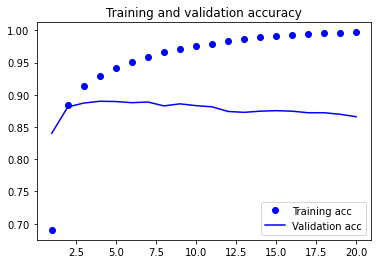

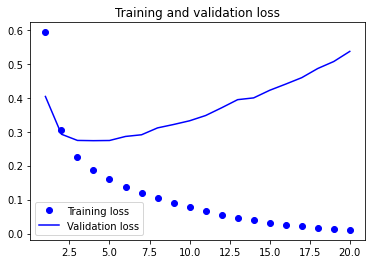

In [49]:
import matplotlib.pyplot as plt

acc = history.history["acc"] # Training accuracy
val_acc = history.history["val_acc"] # Validation accuracy
loss = history.history["loss"] # Training loss
val_loss = history.history["val_loss"] # Validation loss

epochs = range(1, len(acc) + 1) #plots every epoch, here 10

plt.plot(epochs, acc, "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(epochs, val_acc, "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(epochs, loss, "bo", label = "Training loss")
plt.plot(epochs, val_loss, "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

In [50]:
test_results = model.evaluate(x_test, y_test, verbose=False)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

Test results - Loss: 0.556236743927002 - Accuracy: 85.69999933242798%


### Pre-Trained Embedding

- Elimizdeki eğitim verisi küçük olduğunda görev özelinde en uygun gömülmeyi bulmak mümkün olmayabilir.
- Bu durumda gömülmeleri elimizdeki problem yerine dilin jenerik yapısını kavramış kullanışlı özellikler sunan önceden hesaplanmış gömülmeler kullanılabilir.
- En meşhurlar, WordVec, GloVe, 
- GloVe kelime birlikte görülme istatistik matrisini çarpanlarına ayırmaya dayanmaktadır. 

In [52]:
import os

imdb_dir = "imdb"
train_dir = os.path.join(imdb_dir, "train")

labels = []
texts = []

for label_type in ["neg", "pos"]:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname [-4:] == ".txt":
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == "neg":
                labels.append(0)
            else:
                labels.append(1)          

In [53]:
from os import listdir

print(os.listdir())

['.ipynb_checkpoints', '01 ders.ipynb', '02 ders.ipynb', '03 ders.ipynb', '03_ ders.ipynb', '04 ders.ipynb', '05 ders.ipynb', '06 Ders.ipynb', '07 ders.ipynb', '08 Ders.ipynb', 'Backpropagation.ipynb', 'catsdogs', 'cnn', 'convnet_from.keras', 'convnet_with_augmentation.keras', 'evraklar', 'feature_extraction.keras', 'feature_extraction_with_data_augmentation.keras', 'imdb', 'imgs', 'imgs-conv', 'imgs-rnn', 'imgs_lstm', 'NN-Plot-master', 'NN.ipynb', 'pre_trained_glove_model.h5', 'train']


### Tokenize

In [54]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing. sequence import pad_sequences
import numpy as np

maxlen = 100 # 100 kelimeden sonrasını kes
training_samples = 2000 # 200 örnekle eğitilecek 
validation_samples = 100 # Validates o 10000 samples
max_words = 10000 

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index                   # Length: 88582
print("Found %s unique tokens." % len(word_index))

data = pad_sequences(sequences, maxlen=maxlen)

labels = np.asarray(labels)
print("Shape of data tensor:", data.shape)
print("Shape of label tensor:", labels.shape)

# Veri karıştırılıyor, yoksa önce olumsuzlar sonra olumlular gelebilir
indices = np.arange(data.shape[0])  
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

x_train = data[:training_samples] # (200, 100)
y_train = labels[:training_samples] # shape (200,)
x_val = data[training_samples:training_samples+validation_samples] # shape (10000, 100)
y_val = labels[training_samples:training_samples+validation_samples] # shape (10000,)

Found 88582 unique tokens.
Shape of data tensor: (25000, 100)
Shape of label tensor: (25000,)


In [55]:
glove_dir = "imdb"

embeddings_index = {}

f = open(os.path.join(glove_dir, "glove.6B.100d.txt"), encoding='utf-8') 
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype="float32")
    embeddings_index[word] = coefs
f.close()

print("found %s word vectors." % len (embeddings_index))

found 400000 word vectors.


### Embedding Önişlem

In [56]:
embedding_dim = 100 # GloVe, 400.000 kelime için 100 boyutlu Embedding vektörleri içerir

embedding_matrix = np.zeros((max_words, embedding_dim)) # embedding_matrix.shape (10000, 100)
for word, i in word_index.items():
    if i < max_words:
        embedding_vector = embeddings_index.get(word) # embedding_vector.shape (100,)
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector # Yerleştirme dizininde bulunmayan kelimelerin tümü sıfır olacaktır.

In [58]:
embedding_matrix.shape

(10000, 100)

### Model

In [59]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(max_words, embedding_dim, input_length = maxlen)) 
model.add(Flatten()) 
model.add(Dense(32, activation = "relu"))
model.add(Dense(1, activation="sigmoid")) 
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_3 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________


- Parametre Sayısı
    - Embedding = 10.000 x 100 = 1.000.000
    - Dense= 32 x 10.000 + (32 x 1) = 320.032
    - Dense= batch + 1
    - Toplam= 1.320.065

- Gömme katmanı artık tek bir ağırlık matrisine sahiptir: her i girişinin i indeksi ile ilişkilendirilmiştir.

### Embeddingleri modele gönderme

In [60]:
model.layers[0].set_weights([embedding_matrix])
model.layers[0].trainable = True 

- Hazırlanan GloVe matrisi modelin ilk katmanı olan Embeddinge yükleniyor.
- Modelin bazı bölümleri öneğitimli bazı bölümleri rasgele başlamışsa geri yayılımda öneğitimli bölgelerin güncelleme almaması ve öğrendiklerini unutmaması için dondurulur.

In [61]:
model.compile(optimizer = "rmsprop", 
              loss = "binary_crossentropy", # in a multiclass problem categorical_crossentropy would be used
              metrics = ["acc"]) 
history = model.fit(x_train, y_train,
                   epochs = 10,
                   batch_size = 32,
                   validation_data = (x_val, y_val))
model.save_weights("pre_trained_glove_model.h5")      

Epoch 1/10
7/7 [==============================] - 3s 218ms/step - loss: 1.7368 - acc: 0.5363 - val_loss: 1.3569 - val_acc: 0.4999
Epoch 2/10
7/7 [==============================] - 1s 164ms/step - loss: 0.7408 - acc: 0.5849 - val_loss: 0.8224 - val_acc: 0.5106
Epoch 3/10
7/7 [==============================] - 1s 176ms/step - loss: 0.5156 - acc: 0.7886 - val_loss: 0.6908 - val_acc: 0.5571
Epoch 4/10
7/7 [==============================] - 1s 165ms/step - loss: 0.3041 - acc: 0.8987 - val_loss: 0.7264 - val_acc: 0.5574
Epoch 5/10
7/7 [==============================] - 1s 165ms/step - loss: 0.2847 - acc: 0.8716 - val_loss: 0.8558 - val_acc: 0.5324
Epoch 6/10
7/7 [==============================] - 1s 167ms/step - loss: 0.1469 - acc: 0.9720 - val_loss: 1.2226 - val_acc: 0.5036
Epoch 7/10
7/7 [==============================] - 1s 168ms/step - loss: 0.1169 - acc: 0.9675 - val_loss: 0.7552 - val_acc: 0.5691
Epoch 8/10
7/7 [==============================] - 1s 166ms/step - loss: 0.0459 - acc: 0.99

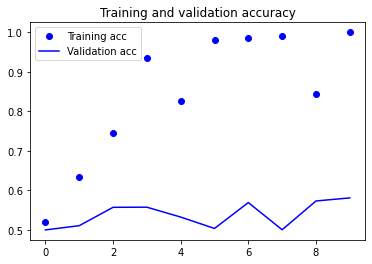

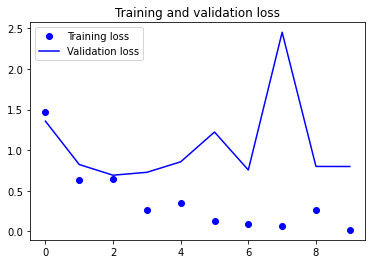

In [62]:
import matplotlib.pyplot as plt

plt.plot(history.history["acc"], "bo", label = "Training acc") # "bo" gives dot plot
plt.plot(history.history["val_acc"], "b", label = "Validation acc") # "b" gives line plot
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()

plt.plot(history.history["loss"], "bo", label = "Training loss")
plt.plot(history.history["val_loss"], "b", label = "Validation loss")
plt.title("Training and validation loss")
plt.legend()

plt.show()

### Test

In [64]:
import os

imdb_dir = "imdb"
train_dir = os.path.join(imdb_dir, "test")

labels = []
texts = []

for label_type in ["neg", "pos"]:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname [-4:] == ".txt":
            f = open(os.path.join(dir_name, fname), encoding='utf-8')
            texts.append(f.read())
            f.close()
            if label_type == "neg":
                labels.append(0)
            else:
                labels.append(1)     

In [65]:
sequences = tokenizer.texts_to_sequences(texts)
x_test = pad_sequences(sequences, maxlen=maxlen)
y_test = np.asarray(labels)

In [66]:
model.load_weights('pre_trained_glove_model.h5')
test_results=model.evaluate(x_test,y_test)
print(f'Test results - Loss: {test_results[0]} - Accuracy: {100*test_results[1]}%')

782/782 [==============================] - 2s 3ms/step - loss: 0.7991 - acc: 0.5772
Test results - Loss: 0.7991190552711487 - Accuracy: 57.71999955177307%
